 <====================    ==      BRAIN TELS LABS    ==  ==========================================>
                 RECONOCIMIENTO DE ROSTROS MEDIANTE PCA Y REDES NEURONALES MULTICAPA

In [1]:
#============================BRAINTELS LABS===============================
#IMAGE PROCESSING  , ARTIFICIAL INTELLIGENCE AND EMBEDDED SYSTEMS 

#IMPORTAR HERRAMIENTAS NECESARIAS
from sklearn.decomposition import PCA 
import os
import numpy as np
from matplotlib import pyplot as plt

#lista con los nombres de personas 
nombres=["ann_veneman_","adrien_brody_","richard_gephardt_","winona_ryder_"]
path=os.getcwd()
datas=[]

for na in nombres:
    #CONSEGUIR LA CANTIDAD DE ELEMENTOS DEL DATASET
    N=len(os.listdir(os.path.join("personas/",na)))
    datas.append(N)
#NÚMERO DE MUESTRAS DISPONIBLES DE TODO EL DATASET
Ns=0
#DETERMINAR LA CANTIDAD DE MUESTRAS
for a in datas:
    Ns=a+Ns
print(Ns)
print(datas)
#CREAR LAS ENTRDAS DESEADAS DE LAS IMAGENES 
#PARAMETRO PARA DETERMINAR LOS COMPONENTES PRINCIPALES DE LA IMAGEN DE ENTRADA 
feat=12
#CONSTRUIR MATRIZ DE Ns x feat*64
X=np.zeros((Ns,int(feat*64)))

#crear objeto PCA para reducir las dimensiones 
pca=PCA(n_components=12) 

ctt=0

for na in nombres:
    #cada nombre
    faces=os.listdir(os.path.join("personas/",na))
    #print(faces)
    for im in faces:
        #leer la imagen
        Igray=plt.imread(os.path.join("personas/",na,im))
        #realizar el uso de la reducción de dimensiones mediante PCA
        Xf=pca.fit_transform(Igray)
        #realizar el proceso de flatten al array
        Xf=Xf.reshape((1,feat*64))
        #agregar el array Xf
        X[ctt,:]=Xf
        #contador + 1
        ctt=ctt+1
#Mostrar forma del arreglo
print(X.shape)
#lista vacia
t=[]
#para cada dato
for val ,it in zip(datas,range(len(datas))):
    
    for i in range(val):
        t.append(it)

#definir función one_hot_encoding(t,N)
def one_hot_encoding(t,N=None):
    S=len(t)
    if N is None:
        print("ERROR")
    else:
        #obtener la información de los elementos de la lista t
        T=np.zeros((S,N),dtype=np.uint8)
        #realizar un recorrido sobre cada elemento de la lista t
        for v,i in zip(t,range(S)):
            if v <N and isinstance(v,int):
                #si i es un valor menor que el parametro S cantidad de muestras
                T[i,v]=1
            else:
                break
        return T
#convertir los labels en matriz mediante el método de one-hot-encoding
T=one_hot_encoding(t,N=4)
print(T.shape)


58
[11, 12, 11, 24]
(58, 768)
(58, 4)


In [2]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

#obtener el conjunto de entrenamiento y validación
X_train,X_val,Y_train,Y_val=tts(X,T,test_size=0.3)

#=========================CREAR EL MODELO DE RED NEURONAL  ==================
network=MLPClassifier(hidden_layer_sizes=(300,100,40),learning_rate_init=0.002,max_iter=1200,
                      solver="adam",activation="relu",early_stopping=True,tol=0.00001 ,
                      verbose=True,n_iter_no_change=25)

#===MÉTODO fit PARA REALIZAR EL ENTRENAMIENTO DE LA RED NEURONAL
network.fit(X_train,Y_train)


Iteration 1, loss = 22.35048167
Validation score: 0.250000
Iteration 2, loss = 14.25070363
Validation score: 0.250000
Iteration 3, loss = 1.76714969
Validation score: 0.250000
Iteration 4, loss = 0.28068900
Validation score: 0.250000
Iteration 5, loss = 0.58142618
Validation score: 0.250000
Iteration 6, loss = 0.32722495
Validation score: 0.250000
Iteration 7, loss = 0.11444475
Validation score: 0.250000
Iteration 8, loss = 0.14670263
Validation score: 0.250000
Iteration 9, loss = 0.01619360
Validation score: 0.250000
Iteration 10, loss = 0.00122788
Validation score: 0.250000
Iteration 11, loss = 0.00114767
Validation score: 0.250000
Iteration 12, loss = 0.00123429
Validation score: 0.250000
Iteration 13, loss = 0.00152556
Validation score: 0.250000
Iteration 14, loss = 0.00137499
Validation score: 0.500000
Iteration 15, loss = 0.00109868
Validation score: 0.500000
Iteration 16, loss = 0.00099946
Validation score: 0.500000
Iteration 17, loss = 0.00100143
Validation score: 0.500000
Iter

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(300, 100, 40), learning_rate='constant',
       learning_rate_init=0.002, max_iter=1200, momentum=0.9,
       n_iter_no_change=25, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=1e-05,
       validation_fraction=0.1, verbose=True, warm_start=False)

VALIDACIÓN CON LOS DATOS DE TRAINING Y TESTING

In [3]:
#====REALIZAR LA PREDICCIÓN MEDIANTE EL USO DE LOS DATOS DE VALIDACIÓN
Yr=network.predict(X_train)
#convertir Yr a yr
yr=np.argmax(Yr,axis=1)

tr=np.argmax(Y_train,axis=1)
#====Uso de la matriz de confusión para obtener la metrica

acc=accuracy_score(yr,tr)
print("======MATRIZ DE CONFUSIÓN======")

cfm=confusion_matrix(yr,tr)

print(cfm)

print("EXACTITUD:",100*acc,"%")

======MATRIZ DE CONFUSIÓN======
[[ 8  0  0  0]
 [ 0 10  0  1]
 [ 0  0  7  0]
 [ 0  0  1 13]]
EXACTITUD: 95.0 %


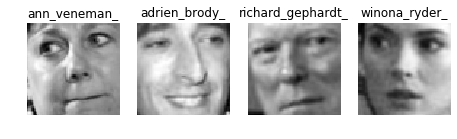

In [4]:
nombres=["ann_veneman_","adrien_brody_","richard_gephardt_","winona_ryder_"]
plt.figure(figsize=(6,5))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
for i in range(4):
    plt.subplot(1,4,i+1)
    im=plt.imread("personas"+"/"+nombres[i]+"/"+nombres[i]+"1.pgm")
    plt.imshow(im,cmap=plt.cm.gray)
    plt.axis("off")
    plt.title(nombres[i])
    

 <====================          BRAIN TELS LABS       ==========================================>
 
 
           Image Processing  , Artificial Intelligence & Embedded Systems 